# **ANALYSIS SENTIMEN PADA REVIEW UNTUK APLIKASI GOJEK**

DOWNLOAD LIBRARY

In [1]:
!pip install Sastrawi
!pip install vaderSentiment
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 7.2 MB/s eta 0:00:00


IMPORT LIBRARY

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

## DATA WRANGLING

In [14]:
df = pd.read_csv('/content/drive/MyDrive/mikti/GojekAppReviewV4.0.0-V4.9.3_Cleaned.csv')
df

,userName,content,score,at,appVersion
0,Yuga Edit,akun gopay saya di blok,1,2022-01-21 10:52:12,4.9.3
1,ff burik,Lambat sekali sekarang ini bosssku apk gojek g...,3,2021-11-30 15:40:38,4.9.3
2,Anisa Suci Rahmayuliani,Kenapa sih dari kemarin sy buka aplikasi gojek...,4,2021-11-29 22:58:12,4.9.3
3,naoki yakuza,Baru download gojek dan hape baru trus ditop u...,1,2022-09-03 15:21:17,4.9.3
4,Trio Sugianto,Mantap,5,2022-01-15 10:05:27,4.9.3
...,...,...,...,...,...
224997,Sad Gamer,Gofood Biaya lain2ya gak ngotak mending hujan2...,1,2023-02-15 09:37:58,4.0.0
224998,fadhil fadil,Yok lah,5,2021-12-11 12:28:20,4.0.0
224999,g sugiarto,Sempurna,5,2022-03-14 01:45:39,4.0.0
225000,J i H A D 'B E,GOJEK LAMA LAMA GAK JELAS LAGI PESEN MASA MAP...,1,2021-12-24 08:48:51,4.0.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225002 entries, 0 to 225001
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   userName    225002 non-null  object
 1   content     225000 non-null  object
 2   score       225002 non-null  int64 
 3   at          225002 non-null  object
 4   appVersion  225002 non-null  object
dtypes: int64(1), object(4)
memory usage: 8.6+ MB


In [16]:
# Mengecek data yang Null
df.isnull().sum()

,0
userName,0
content,2
score,0
at,0
appVersion,0


In [17]:
# Mengecek data yang duplicate
df.duplicated().sum()

0

## EDA, Cleansing, dan Preprocessing

In [18]:
# Menghapus data yang kosong dan duplikat
df = df.dropna(subset = ['content']).drop_duplicates()

In [19]:
# Melakukan analisis untuk review appVersion 4.8
sum(df["appVersion"].str.startswith("4.8"))

8091

In [20]:
# Ambil kolom yang dibutuhkan
df = df[df["appVersion"].str.startswith("4.8")]
df = df.loc[:, ['userName', 'content', 'score']]

df

,userName,content,score
133,Abu karim aljabbar Mkatiksaidi,Ramah banget,5
134,Fathan Mubina,Setelah update kok nggak bisa dibuka,4
135,Nyauw Jin Fie,Good,5
136,Tanaka Kun,Good,5
137,Anton S.,Sangat membantu,5
...,...,...,...
8219,Malik Azis,Gopay mantap,5
8220,Zunus,Tiba tidak bisa d buka aplnya Udah hapus downl...,1
8221,Mutiara Purnama,Bye bye gojek beralih ke ijo 1 lahi lebih mantapp,1
8222,Melanie Anggi,Kok saya gak ada fitur gomed nya ya,5


In [21]:
# Download modul
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [22]:
# Melakukan konversi kata menjadi lowercase semua serta menghilangkan stopwords
stop_words = stopwords.words('indonesian') + stopwords.words('english') + ["yg", "gak", "ngisi", "udah", "d", "sih", "nya", "srg", "utk", "byk", "gk", "ga", "aja", "tp", "udh"]
df['content'] = df['content'].apply(lambda x: [word.lower() for word in word_tokenize(x) if (word.isalpha() and word.lower() not in stop_words)])

In [23]:
df['content'] = df['content'].apply(lambda x: " ".join(x))
df

,userName,content,score
133,Abu karim aljabbar Mkatiksaidi,ramah banget,5
134,Fathan Mubina,update nggak dibuka,4
135,Nyauw Jin Fie,good,5
136,Tanaka Kun,good,5
137,Anton S.,membantu,5
...,...,...,...
8219,Malik Azis,gopay mantap,5
8220,Zunus,buka aplnya hapus download beberpa kali restar...,1
8221,Mutiara Purnama,bye bye gojek beralih ijo lahi mantapp,1
8222,Melanie Anggi,fitur gomed ya,5


### Stemming / Lemmatization

In [24]:
stemmer = StemmerFactory().create_stemmer()
df['content'] = df['content'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
df

,userName,content,score
133,Abu karim aljabbar Mkatiksaidi,ramah banget,5
134,Fathan Mubina,update nggak buka,4
135,Nyauw Jin Fie,good,5
136,Tanaka Kun,good,5
137,Anton S.,bantu,5
...,...,...,...
8219,Malik Azis,gopay mantap,5
8220,Zunus,buka aplnya hapus download beberpa kali restar...,1
8221,Mutiara Purnama,bye bye gojek alih ijo lah mantapp,1
8222,Melanie Anggi,fitur gomed ya,5


## Sentiment analysis

In [25]:
analyzer = SentimentIntensityAnalyzer()

additional_lexicon_id = {
    'kecewa': -0.4,
    'rugi': -1,
    'buruk': -0.6,
    'jelek': -0.6,
    'lelet': -0.7,
    'gagal': -0.5,
    'parah': -0.6,
    'mahal': -0.3,
    'tolong': -0.1,
    'hilang': -0.3,
    'gajelas': -0.3,
    'gj': -0.3,
    'promo': 0.6,
    'kadang': -0.1,
    'maling': -0.5,
    'ganggu': 0.3,
    'sedot': -0.5,
    'bagus': 0.5,
    'pulsa': 0,
    'potong': -1,
    'baik': 0.5,
    'kntl': -1,
    'ngelag': -0.8,
    'salah': -0.5,
    'bintang': 0,
    'benerin': -0.4,
    'lambat': -0.8,
    'siput': -0.4,
    'mati': -0.7,
    'minimal': -0.3,
    'susah': -0.6,
    'nagih': -0.6,
    'capek': -0.7,
    'kacau': -0.3,
    'tagih': -0.3,
    'mantap': 1,
    'puas': 0.9,
    'sampah': -0.5,
    'sulit': -0.6,
    'aneh': -0.4,
}

analyzer.lexicon.update(additional_lexicon_id)

df['sentimen'] = df['content'].apply(lambda x: 'Positif' if analyzer.polarity_scores(x)['compound'] > 0 else ('Negatif' if analyzer.polarity_scores(x)['compound'] < 0 else 'Netral'))

df

,userName,content,score,sentimen
133,Abu karim aljabbar Mkatiksaidi,ramah banget,5,Netral
134,Fathan Mubina,update nggak buka,4,Netral
135,Nyauw Jin Fie,good,5,Positif
136,Tanaka Kun,good,5,Positif
137,Anton S.,bantu,5,Netral
...,...,...,...,...
8219,Malik Azis,gopay mantap,5,Positif
8220,Zunus,buka aplnya hapus download beberpa kali restar...,1,Netral
8221,Mutiara Purnama,bye bye gojek alih ijo lah mantapp,1,Netral
8222,Melanie Anggi,fitur gomed ya,5,Netral


In [26]:
# Distribusi label sentiment
temp = df.groupby('sentimen').count()['content'].reset_index().sort_values(by='content',ascending=False)
temp.style.background_gradient(cmap='inferno_r')

,sentimen,content
1,Netral,3987
2,Positif,2542
0,Negatif,1562


### Visualisasi Distribusi sentimen

<Axes: xlabel='sentimen', ylabel='count'>

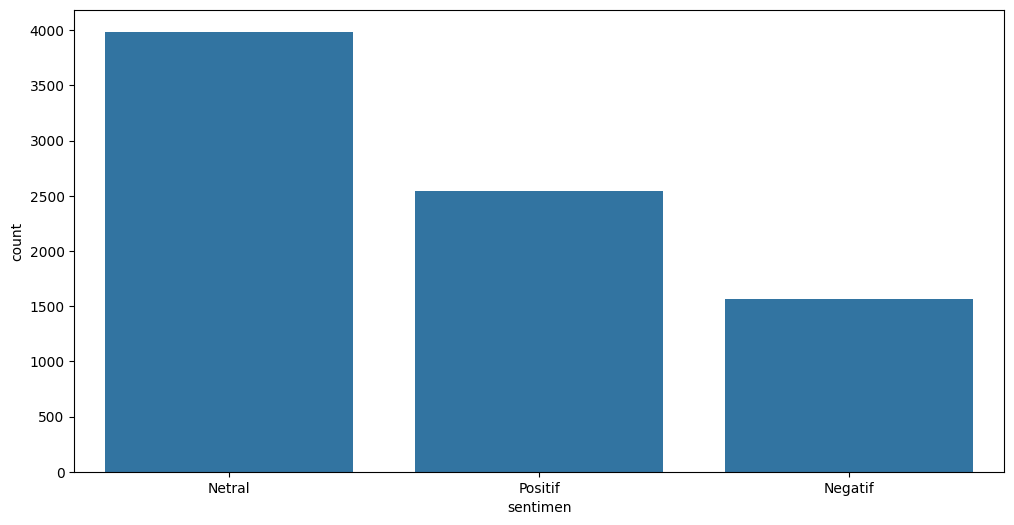

In [27]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentimen',data=df)

In [28]:
fig = go.Figure(go.Funnelarea(
    text =temp.sentimen,
    values = temp.content,
    title = {"position": "top center", "text": "Funnel-Chart dari Distribusi target"}
    ))
fig.show()

**PERSEBARAN SENTIMENT NETRAL**

In [36]:
df_netral = df[df['sentimen'] == 'Netral']
TNetral = pd.Series(' '.join(df_netral['content']).split()).value_counts()
head_netral=TNetral.head(20)
head_netral

,count
bantu,517
gojek,486
aplikasi,471
driver,311
mudah,194
gopay,166
cepat,146
oke,144
buka,141
bayar,127


In [41]:
# histrogram
fig = px.histogram(head_netral, x=head_netral.index, y=head_netral.values)
fig.update_layout(
    title="Total kata untuk sentimen Netral",
    xaxis_title="Kata",
    yaxis_title="Jumlah kata"
)
fig.show()

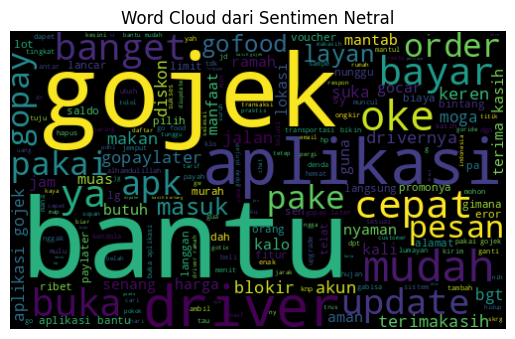

In [44]:
all_words_netral = ' '.join([i for i in df_netral['content']])
wordcloud_netral = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(all_words_netral)

plt.imshow(wordcloud_netral, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud dari Sentimen Netral')
plt.show()

**PERSEBARAN SENTIMENT POSITIF**

In [45]:
df_postif = df[df['sentimen'] == 'Positif']
TPostif = pd.Series(' '.join(df_postif['content']).split()).value_counts()
head_postif=TPostif.head(20)
head_postif

,count
bagus,562
mantap,478
ok,429
good,327
gojek,271
aplikasi,261
promo,237
baik,186
driver,117
top,110


In [46]:
# histrogram
fig = px.histogram(head_postif, x=head_postif.index, y=head_postif.values)
fig.update_layout(
    title="Total kata untuk sentimen Positif",
    xaxis_title="Kata",
    yaxis_title="Jumlah kata"
)
fig.show()

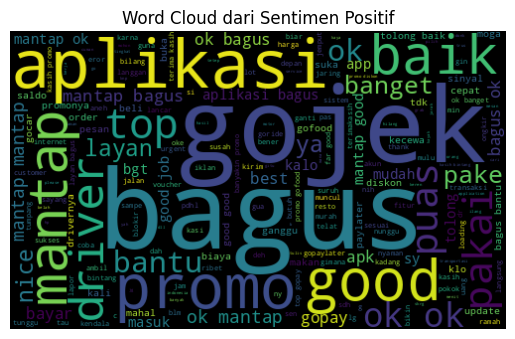

In [49]:
all_words_positif = ' '.join([i for i in df_postif['content']])
wordcloud_positif = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(all_words_positif)

plt.imshow(wordcloud_positif, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud dari Sentimen Positif')
plt.show()

**PERSEBARAN SENTIMENT NEGATIF**

In [50]:
df_neg = df[df['sentimen'] == 'Negatif']
Tneg = pd.Series(' '.join(df_neg['content']).split()).value_counts()
head_neg=Tneg.head(20)
head_neg

,count
gojek,475
aplikasi,462
driver,449
gopay,282
susah,238
tolong,235
bayar,234
banget,188
mahal,161
saldo,156


In [51]:
# histrogram
fig = px.histogram(head_neg, x=head_neg.index, y=head_neg.values)
fig.update_layout(
    title="Total kata untuk sentimen Negatif",
    xaxis_title="Kata",
    yaxis_title="Jumlah kata"
)
fig.show()

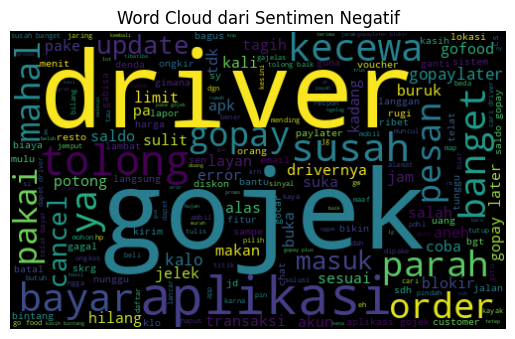

In [52]:
all_words_neg = ' '.join([i for i in df_neg['content']])
wordcloud_neg = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(all_words_neg)

plt.imshow(wordcloud_neg, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud dari Sentimen Negatif')
plt.show()

### VICTORIZATION DENGAN TF-DIF

In [56]:
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['content'])
X_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## MODELLING

In [60]:
# splitting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['sentimen'], test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((6472, 6961), (1619, 6961))

In [61]:
# menampilkan total dari netral, positif, dan negatif dari data train
y_train.value_counts()

,count
sentimen,
Netral,3186
Positif,2025
Negatif,1261


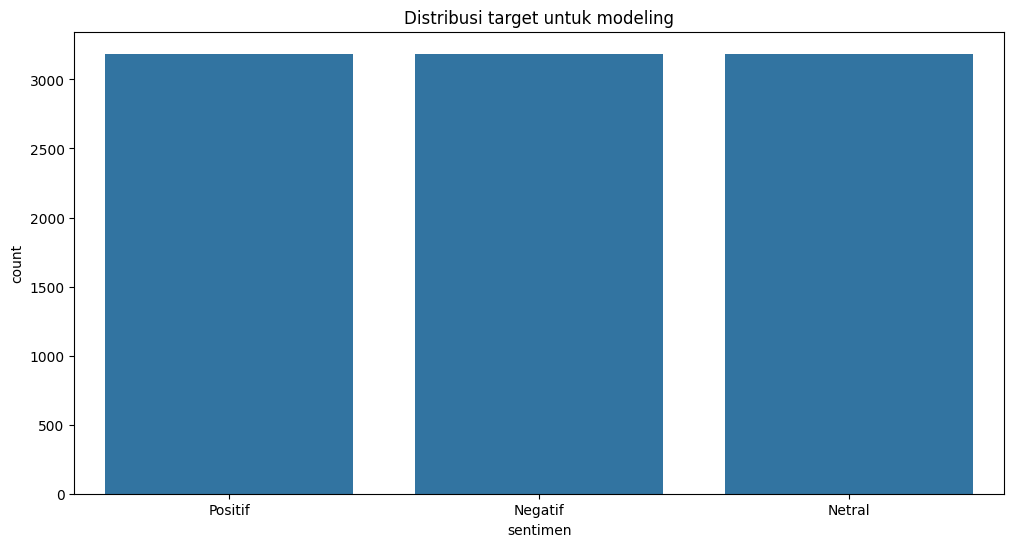

In [62]:
# Resampling target

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

plt.figure(figsize=(12, 6))
sns.countplot(x=y_train)
plt.title('Distribusi target untuk modeling')
plt.show()

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [64]:
# init parameters
rf_param_grid = {'n_estimators': [50, 100, 200],
                 'max_depth': [None, 10, 20, 30],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4]}

In [65]:
rf_model = RandomizedSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42)
rf_model.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, scoring='accuracy')

In [66]:
# evaluasi model
from sklearn.metrics import classification_report

y_pred_rf = rf_model.best_estimator_.predict(X_test)

print("\n\nClassification Report for Random Forest (Tuned):")
print(classification_report(y_test, y_pred_rf))



Classification Report for Random Forest (Tuned):
              precision    recall  f1-score   support

     Negatif       0.83      0.94      0.88       301
      Netral       0.96      0.97      0.96       801
     Positif       0.98      0.90      0.94       517

    accuracy                           0.94      1619
   macro avg       0.92      0.93      0.93      1619
weighted avg       0.94      0.94      0.94      1619



## **PERCOBAAN**



In [74]:
# Mengambil input teks dari pengguna
new_text = input("Masukkan teks untuk prediksi sentimen: ")

# Mengubah teks menjadi bentuk numerik
transformed_text = tfidf_vectorizer.transform([new_text])

# Melakukan prediksi menggunakan model
prediction = rf_model.best_estimator_.predict(transformed_text)

# Menampilkan hasil prediksi
print(f"Teks: {new_text}\nPrediksi Sentimen: {prediction}")

Masukkan teks untuk prediksi sentimen: aplikasi ini bagus, UI yang menarik, tetapi terkadang lama untuk drivernya
Teks: aplikasi ini bagus, UI yang menarik, tetapi terkadang lama untuk drivernya
Prediksi Sentimen: ['Positif']
